#### imports

In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [11]:
train = pd.read_csv('train.csv')
train.describe() # First look at the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# See what happened to the family of 8
largefam = train[train['SibSp']==8]
largefam['Survived'] # :-(

159    0
180    0
201    0
324    0
792    0
846    0
863    0
Name: Survived, dtype: int64

In [13]:
train.head() # Look at all the fields in the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# Fill in missing values in age with the median
train['Age'] = train['Age'].fillna(train['Age'].median())

In [26]:
# Convert the gender into boolean variable
train.loc[train['Sex']=='male','Sex'] = 0
train.loc[train['Sex']=='female','Sex'] = 1
train['Sex'] = pd.to_numeric(train['Sex'])

In [27]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [28]:
# Look at the different values for 'Embarked'
pd.pivot_table(train,values='PassengerId',index='Embarked',aggfunc=('count'))

Embarked
0    646
1    168
2     77
Name: PassengerId, dtype: int64

In [29]:
# Fill in missing values in embarked with most frequent value 's'
train['Embarked'] = train['Embarked'].fillna('S')
pd.pivot_table(train,values='PassengerId',index='Embarked',aggfunc=('count'))

Embarked
0    646
1    168
2     77
Name: PassengerId, dtype: int64

In [48]:
# Convert Embarked to numeric values
train.loc[train['Embarked']=='S','Embarked'] = 0
train.loc[train['Embarked']=='C','Embarked'] = 1
train.loc[train['Embarked']=='Q','Embarked'] = 2
train['Embarked'] = pd.to_numeric(train['Embarked'])

TypeError: invalid type comparison

In [31]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


## Data cleansing done, on to analysis...

In [32]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

#### First we'll explore correlation between class and survival, as we believe anecdotally that passengers of lower class were more likely to die.

In [37]:
pd.pivot_table(train,values='PassengerId',index='Pclass',columns='Survived',aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [126]:
classes = train.Pclass.unique()
classes.sort()
for i in classes:
    print 'class',i,'survived = ',int(float(train[(train.Pclass==i) & (train.Survived==1)]\
    ['PassengerId'].count())/train[train.Pclass==i]['PassengerId'].count()*100),'%'

class 1 survived =  62 %
class 2 survived =  47 %
class 3 survived =  24 %


Observations:
* Survival rate decreases with class 
* Only passengers in 1st class had more survivors than victims.
* 3rd class passengers survival rate just above 1/3 that of 1st class

Seems like Pclass will be a good feature for model.

#### Next we'll look at Age and Gender to see if it was really "women and children first" onto the lifeboats.

In [175]:
train.Age.max()

80.0

In [176]:
def survive_by_age(agebins,dataframe):
    dataframe['AgeBins'] = pd.cut(dataframe.Age,agebins)
    ages = dataframe.AgeBins.unique()
    ages.sort()
    for i in ages:
        print train[train.AgeBins==i]['PassengerId'].count(),'passengers in age range',i,':',\
        int(float(train[(train.AgeBins==i) & (train.Survived==1)]\
        ['PassengerId'].count())/train[train.AgeBins==i]['PassengerId'].count()*100),'% survived.'

In [177]:
# Survival by 5 year age bins
survive_by_age(range(0,90,5),train)

44 passengers in age range (0, 5] : 70 % survived.
20 passengers in age range (5, 10] : 35 % survived.
19 passengers in age range (10, 15] : 57 % survived.
96 passengers in age range (15, 20] : 34 % survived.
122 passengers in age range (20, 25] : 34 % survived.
285 passengers in age range (25, 30] : 32 % survived.
88 passengers in age range (30, 35] : 46 % survived.
67 passengers in age range (35, 40] : 41 % survived.
47 passengers in age range (40, 45] : 36 % survived.
39 passengers in age range (45, 50] : 41 % survived.
24 passengers in age range (50, 55] : 41 % survived.
18 passengers in age range (55, 60] : 38 % survived.
14 passengers in age range (60, 65] : 28 % survived.
3 passengers in age range (65, 70] : 0 % survived.
4 passengers in age range (70, 75] : 0 % survived.
1 passengers in age range (75, 80] : 100 % survived.


In [178]:
# Survival by 10 year age bins
survive_by_age(range(0,90,10),train)

64 passengers in age range (0, 10] : 59 % survived.
115 passengers in age range (10, 20] : 38 % survived.
407 passengers in age range (20, 30] : 33 % survived.
155 passengers in age range (30, 40] : 44 % survived.
86 passengers in age range (40, 50] : 38 % survived.
42 passengers in age range (50, 60] : 40 % survived.
17 passengers in age range (60, 70] : 23 % survived.
5 passengers in age range (70, 80] : 20 % survived.


In [179]:
# Survival under 18/over 18
survive_by_age((0,18,100),train)

139 passengers in age range (0, 18] : 50 % survived.
752 passengers in age range (18, 100] : 36 % survived.


In [180]:
# Survival under 16/over 16
survive_by_age((0,16,100),train)

100 passengers in age range (0, 16] : 55 % survived.
791 passengers in age range (16, 100] : 36 % survived.


In [182]:
# Survival under 13/over 13
survive_by_age((0,13,100),train)

71 passengers in age range (0, 13] : 59 % survived.
820 passengers in age range (13, 100] : 36 % survived.


#### Plot correlations of features selected for model.

Axes(0.125,0.125;0.62x0.775)


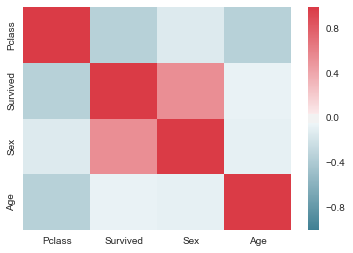

In [183]:
colour_map = sns.diverging_palette(220, 10, as_cmap=True)
correlations = train[['Pclass','Survived','Sex','Age']].corr()
# print correlations
print sns.heatmap(correlations,cmap=colour_map)